<a href="https://colab.research.google.com/github/rforray/world_happiness_2017/blob/master/World_Happiness_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#World Happiness 2017


The World Happiness Report is an annual report which utilizes data from Gallup's World Poll and ranks all countries based on a happiness score. Additionally, the report considers 6 factors which have been most closely linked to happiness and allocates a score for each factor which signifies the strength of the factor. The goal of my project is to analyze the data within the 2017 report, and to merge the World Happiness dataset with a UN Dataset od additional data to better understand the happines scores.


<img src="https://media.giphy.com/media/Lb4IZLmCfALhm/giphy.gif" width="200" align="center">



In the first two steps below I will be importing the 2017 World Happiness dataset, which I will call happy2017, as well as the 2017 UN dataset which I will call un_data. After this step I use the info method to understand the available data.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
happy2017 = pd.read_csv('world.happiness.2017.csv')
un_data= pd.read_csv('country_profile_variables.csv')

In [0]:
print(happy2017.info())
#this is used to get all columns and data types from the happy2017 dataframe
print(un_data.info())
#this is used to get all columns and data types from the happy2017 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
country                                                       229 non-null o

At this point, I wanted to merge the world happiness and un data and I thought the unique value which they could be joined on would be Country but in the un_data dataframe the column is named with a lowercase country. Therefore, I need to rename this column and before I attempt to merge.

In [0]:
un_data.rename(columns={'country': 'Country'}, inplace=True)

#I use inplace=True because I do want to change the dataframe and I can check with un_data.head(1) below to see that my change worked
# un_data.head(1)

Next, I need to spend some time cleaning the data. The countries are not named consistently between the two dataframes so I will use the countries from happy2017 as the source of truth and re-name the countries in un_data where necessary

In [0]:
sorted_happy = happy2017[['Country']].sort_values('Country',ascending=True)
sorted_happy['Country'].unique()
#used to get a list of all countries in alphabetical order from happy2017 which will be compared to un_data

sorted_un = un_data[['Country']].sort_values('Country', ascending = True)
sorted_un['Country'].unique()
#used to get a list of all countries in alphabetical order from un_data 

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
     

# The following discrepencies in Country were found and will be resolved by updating the names in un_data
Bolivia (Plurinational State of) : Bolivia, China, Hong Kong SAR : Hong Kong S.A.R., China, Congo : Congo (Brazzaville), Democratic Republic of the Congo : Congo (Kinshasa), Iran (Islamic Republic of) : Iran, Republic of Korea : South Korea , Republic of Moldova: Moldova, Russian Federation : Russia, State of Palestine: Palestinian Territories, Syrian Arab Republic: Syria, The former Yugoslav Republic of Macedonia : Macedonia, United Republic of Tanzania : Tanzania, United States of America : United States, Venezuela (Bolivarian Republic of) : Venezuela , Viet Nam : Vietnam.  


In [0]:
un_data['Country'].replace({'Bolivia (Plurinational State of)': 'Bolivia', 'China, Hong Kong SAR': 'Hong Kong S.A.R., China',  'Congo': 'Congo (Brazzaville)', "Democratic Republic of the Congo": 'Congo (Kinshasa)', 'Iran (Islamic Republic of)': 'Iran', 'Republic of Korea': 'South Korea', 'Republic of Moldova' : 'Moldova', 'Russian Federation': 'Russia', 'State of Palestine': 'Palestinian Territories', 'Syrian Arab Republic': 'Syria', 'The former Yugoslav Republic of Macedonia': 'Macedonia', 'United Republic of Tanzania': 'Tanzania', 'United States of America': 'United States', 'Venezuela (Bolivarian Republic of)': 'Venezuela', 'Viet Nam': 'Vietnam' }, inplace=True)

# Values only in 1 data source which will be dropped:
American Samoa, Andorra, Anguilla, Antigua and Barbuda, Aruba, Bahamas, Barbados, Bermuda, Bonaire, Sint Eustatius and Saba, British Virgin Islands, Brunei Darussalam, Cabo Verde, Cayman Islands, Channel Islands, China, Macao SAR, Comoros, Cook Islands, Cuba, Democratic People's Republic of Korea, Cook Islands, Djibouti, Dominica, Equatorial Guinea, Eritrea, Falkland Islands (Malvinas), Faroe Islands, Fiji, French Guiana, French Polynesia, Gambia, Gibraltar, Greenland, Grenada, Guadeloupe, Guam, Guinea-Bissau, Guyana, Holy See, Honduras, Isle of Man, Ivory Cost, Kosova, Kiribati, Lao People's Democratic Republic, Liechtenstein, Maldives, Marshall Islands, Martinique, Mayotte, Micronesia (Federated States of), Moldova, Monaco, Montserrat, Nauru, New Caledonia, North Cyprus, Niue, Northern Mariana Islands, Oman, Palau, Papua New Guinea, Puerto Rico, Saint Helena, Saint Kitts and Nevis, Saint Lucia, Saint Pierre and Miquelon, Saint Vincent and the Grenadines, Samoa, San Marino, Sao Tome and Principe, Solomon Islands, Suriname, Swaziland, Taiwan Province of China, Timor-Leste, Tokelau, Tonga, Turks and Caicos Islands, Tuvalu, United States Virgin Islands, Vanuatu, Wallis and Futuna Islands, Western Sahara

In [0]:
# In this step I am actually merging to two datasets on the Country column and renamed my new datafram merged_country
merged_country = pd.merge(happy2017, un_data, on='Country')

In [0]:
#Here I am getting a sense of what the merged dataframe merged_country looks like and checking that the merge was succesfull
merged_country.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,NorthernEurope,386194,5305,14.5,101.8,386578,1.6,74185.5,1.8,34.6,63.5,2.2,20.2,77.6,5.1,61.1/68.3,103,104,89120,72473,16647,33746,1.2,80.5,1.3,1.8,83.6/79.5,17.8/22.3,741.8/14.2,73.2,2.4,9.7,4.4,7.4,100.3/100.5,111.1/114.7,91.5/62.8,39.6,113.6,96.8,64,33.2,47.6/9.2,8204,233,100.0/100.0,98.0/98.3,-99,-99
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,NorthernEurope,42921,5734,135.1,99.0,301308,1.6,53149.3,1.2,22.9,75.8,2.4,19.2,78.4,6.0,58.1/66.0,105,105,94355,85133,9222,27582,0.5,87.7,0.6,1.7,82.2/78.1,16.5/25.3,572.5/10.1,48.2,3.5,10.8,3.6,8.6,100.7/102.3,133.4/128.3,96.3/69.7,37.4,128.3,96.3,47,14.4,33.5/5.9,666,119,100.0/100.0,99.6/99.6,-99,-99
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,NorthernEurope,103000,335,3.3,100.7,16780,4.2,50936.0,6.4,24.0,69.7,4.0,17.7,78.2,3.6,70.3/77.2,117,117,4450,5703,-1254,854,0.6,94.1,1.3,2.0,83.8/80.6,20.1/20.1,37.5/11.4,0.5,1.6,8.9,3.8,7.8,98.6/99.7,121.0/116.3,103.1/60.2,47.6,114.0,98.2,27,0.5,2.0/6.1,284,952,100.0/100.0,98.7/100.0,-99,-99
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,WesternEurope,41291,8476,214.5,98.2,670790,0.8,80831.1,0.7,25.5,73.8,3.5,20.4,76.1,4.6,62.5/74.5,106,106,304691,269157,35534,77378,1.2,73.9,1.1,1.5,84.8/80.5,14.9/24.1,2438.7/29.4,110.1,3.9,11.7,4.1,5.1,103.8/104.1,99.4/103.0,58.5/56.9,32.5,142.0,88.0,74,31.6,35.3/4.3,552,126,100.0/100.0,99.9/99.8,-99,-99
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,

Next, I noticed that the un_data was able to provide regions of the countries and I thought it would be interesting to understand the mean Happiness Score by region, so I take this as a next step. In this step I learn that Oceania has the highest mean score (7.299) and Middle Africa has the lowest score (4.0221).

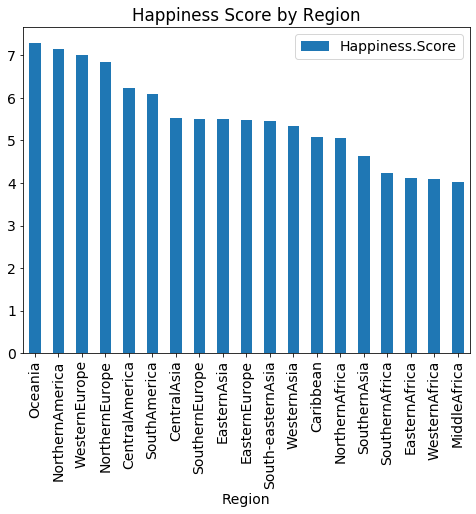

In [0]:

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14


merged_country['Region' ].unique()
by_region_average = merged_country[['Region', 'Country', 'Happiness.Score']].groupby('Region').mean()
by_region_average.sort_values('Happiness.Score',ascending=False).plot(kind='bar')
plt.xlabel('Region')
plt.title('Happiness Score by Region');


Next, un_data provides lot of valuable data which isn't necessary captured within happy2017. It's possible that there could be a coorelation between some of this data and the happiness score. To investigate this correlation I can use scatterplots. Interestingly, I found a correlation between countries with a higher % of total population living in urban areas and a higher happiness score.

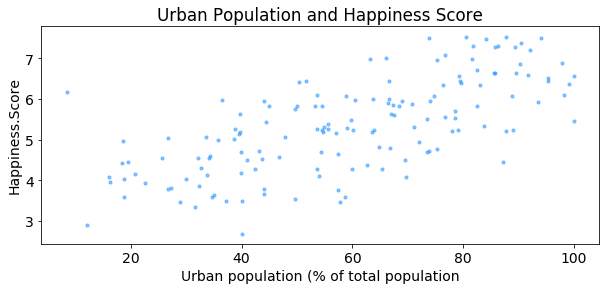

In [0]:
merged_country.plot(kind='scatter', x='Urban population (% of total population)', y='Happiness.Score', \
        color='dodgerblue', figsize=(10,4), s=10, alpha=0.5)
plt.xlabel('Urban population (% of total population')
plt.title('Urban Population and Happiness Score');

Finally I created a function where someone can enter any list of countries and the function will return a bar chart with the countries plotted by happiness score.

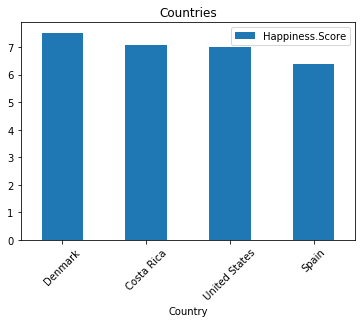

In [0]:
def happy(*args): 
  filter_list = []
  for country in args:
    filter_list.append(country)

  rank = merged_country[merged_country.Country.isin(filter_list)]
  rank = rank.set_index('Country')
  rank[['Happiness.Score']].plot(kind='bar', rot = 45, title='Countries')
  

happy('United States', 'Denmark', 'Spain', 'Costa Rica')


Name countries, separated by commas: 
United States,Denmark,Spain
input is: United States,Denmark,Spain
list is: ['United States', 'Denmark', 'Spain']


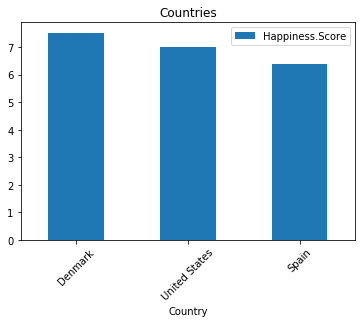

In [0]:
countries = input('Name countries, separated by commas: \n')
print(f'input is: {countries}')
countries_list = countries.split(',')
print(f'list is: {countries_list}')
happy(*countries_list)